# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


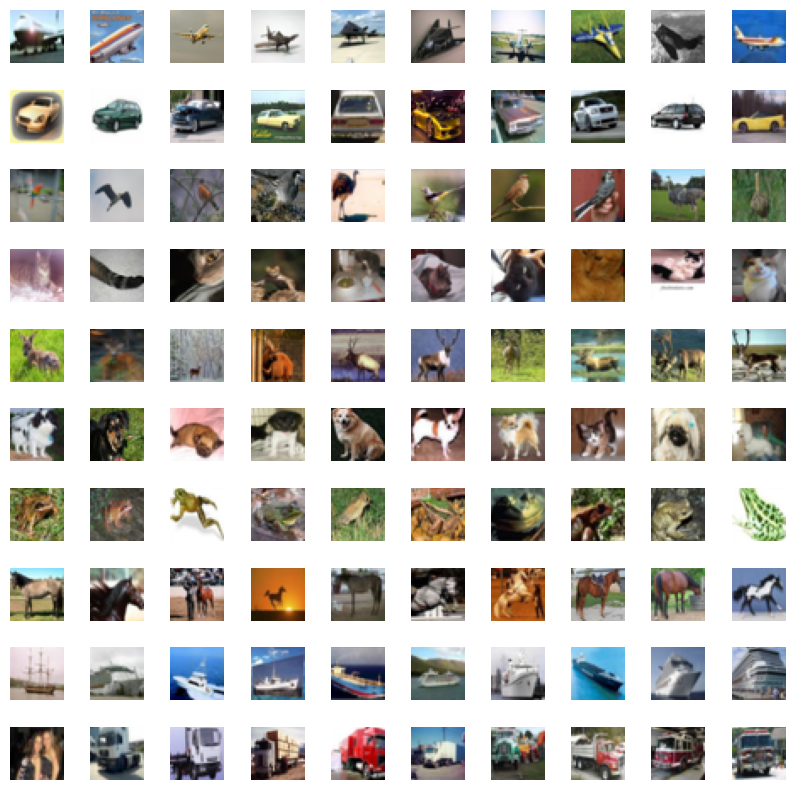

In [3]:
# Your code here :
Classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Create a 10 x 10 plot showing 10 random samples from each class.
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    random_indices = np.random.choice(class_indices, 10, replace=False)

    for j, idx in enumerate(random_indices):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(Classes[i], fontsize=8, rotation=90, labelpad=10)

plt.show()

# Convert the labels to one-hot encoded form.
y_train_encod = to_categorical(y_train, num_classes=10)
y_test_encod = to_categorical(y_test, num_classes=10)

# Normalize the images.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :
my_model = Sequential()
my_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Flatten())
my_model.add(Dense(units=100, activation='relu'))
my_model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Your code here :
optimizer = SGD(learning_rate=0.01)
my_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Training
history = my_model.fit(x_train, y_train_encod, epochs=50, batch_size=512)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.1591 - loss: 2.2639
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2507 - loss: 2.1098
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2948 - loss: 1.9969
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3221 - loss: 1.9372
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3363 - loss: 1.8947
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3484 - loss: 1.8614
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3616 - loss: 1.8266
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3634 - loss: 1.8069
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3792 - loss: 1.7738
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3891 - loss: 1.7521
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4027 - loss: 1.7151
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0

*   Plot the cross entropy loss curve and the accuracy curve

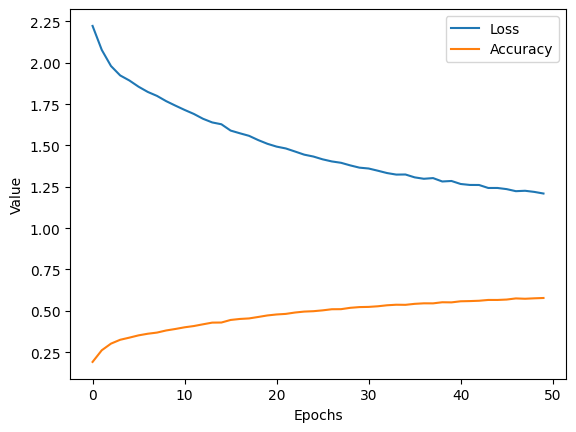

In [7]:
# Your code here :
plt.plot(my_model.history.history['loss'], label='Loss') # cross entropy loss curve
plt.plot(my_model.history.history['accuracy'], label='Accuracy') # accuracy curve
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :
my_vgg_model = Sequential()
my_vgg_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
my_vgg_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same' ))
my_vgg_model.add(MaxPooling2D(pool_size=(2,2)))

my_vgg_model.add(Flatten())
my_vgg_model.add(Dense(units=128, activation='relu'))
my_vgg_model.add(Dense(units=10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
optimizer = SGD(learning_rate=0.001)
my_vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

vgg_history = my_vgg_model.fit(x_train, y_train_encod, epochs=50, batch_size=512, validation_data=(x_test, y_test_encod))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.1019 - loss: 2.3113 - val_accuracy: 0.1169 - val_loss: 2.2939
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1167 - loss: 2.2919 - val_accuracy: 0.1305 - val_loss: 2.2818
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1290 - loss: 2.2801 - val_accuracy: 0.1483 - val_loss: 2.2704
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1479 - loss: 2.2693 - val_accuracy: 0.1636 - val_loss: 2.2582
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1669 - loss: 2.2567 - val_accuracy: 0.1808 - val_loss: 2.2447
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1861 - loss: 2.2428 - val_accuracy: 0.2015 - val_loss: 2.2294
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2030 - loss: 2.2268 - val_accuracy: 0.2208 - val_loss: 2.2123
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2160 - loss: 2.2093 - val_accuracy: 0.2354 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


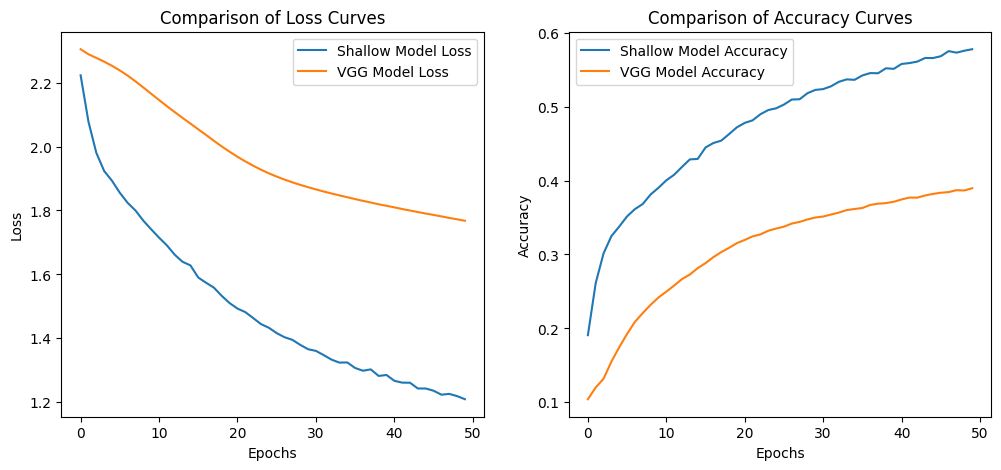

In [11]:
# Your code here :
plt.figure(figsize=(12, 5))

# Cross Entropy Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Shallow Model Loss')
plt.plot(vgg_history.history['loss'], label='VGG Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Loss Curves')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Shallow Model Accuracy')
plt.plot(vgg_history.history['accuracy'], label='VGG Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Curves')
plt.legend()

plt.show()

**Comment on the observation**

The shallow model performs better, with lower loss and higher accuracy. The VGG model learns slower, likely due to suboptimal hyperparameters.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


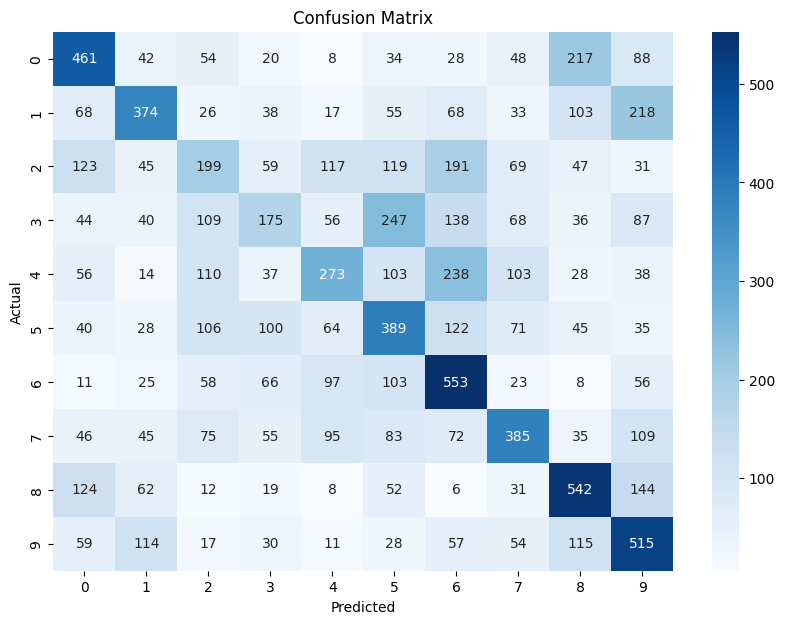

In [12]:
# Your code here :
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = my_vgg_model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encod, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

The model performs well for some classes but struggles with others, especially classes 2, 3, and 4, showing significant misclassifications. Improving the model with more training, data augmentation, or hyperparameter tuning may help.

*    Print the test accuracy for the trained model.

In [13]:
# Your code here :
test_loss, test_accuracy = my_vgg_model.evaluate(x_test, y_test_encod)

print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3887 - loss: 1.7644
Test Accuracy: 0.3866


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [14]:
from keras.backend import clear_session
clear_session()

In [15]:
# Your code here :
vgg_model = Sequential()
vgg_model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
vgg_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D(pool_size=(2,2)))
vgg_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
vgg_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D(pool_size=(2,2)))
vgg_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
vgg_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D(pool_size=(2,2)))
vgg_model.add(Flatten())
vgg_model.add(Dense(units=128, activation='relu'))
vgg_model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 793ms/step - accuracy: 0.1002 - loss: 2.3016 - val_accuracy: 0.1002 - val_loss: 2.3010
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 381ms/step - accuracy: 0.1022 - loss: 2.3009 - val_accuracy: 0.1019 - val_loss: 2.3004
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - accuracy: 0.1006 - loss: 2.3005 - val_accuracy: 0.1070 - val_loss: 2.2998
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 373ms/step - accuracy: 0.1092 - loss: 2.2997 - val_accuracy: 0.1221 - val_loss: 2.2992
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.1295 - loss: 2.2992 - val_accuracy: 0.1398 - val_loss: 2.2986
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 373ms/step - accuracy: 0.1423 - loss: 2.2988 - val_accuracy: 0.1551 - val_loss: 2.2980
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.1592 - loss: 2.2982 - val_accuracy: 0.1660 - val_loss: 2.2974
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - accuracy: 0.1662 - loss: 2.2976 - val_acc

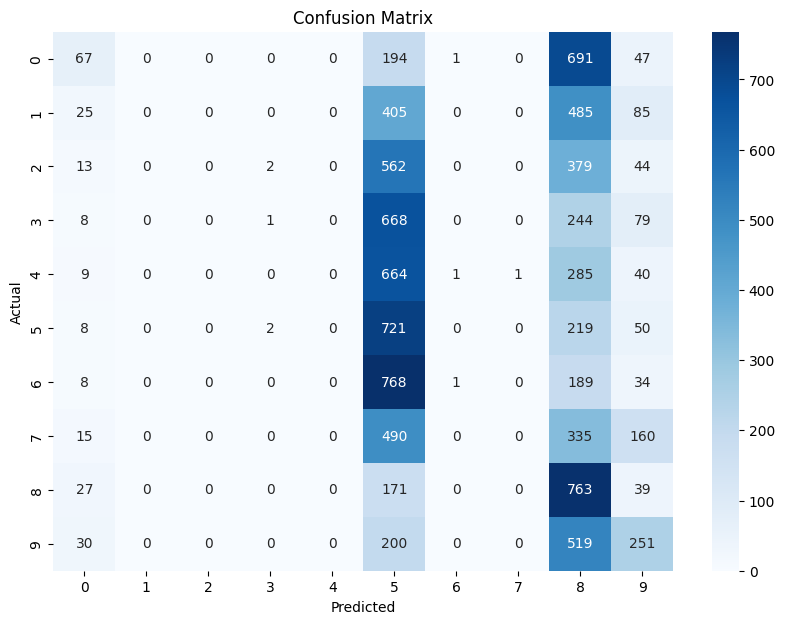

In [18]:
# Your code here :
import tensorflow as tf
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))
# Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
optimizer = SGD(learning_rate=0.001)
vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#  Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
vgg_model_history = vgg_model.fit(x_train_resized, y_train_encod, epochs=10, batch_size=512, validation_data=(x_test_resized, y_test_encod))

y_pred = vgg_model.predict(x_test_resized)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encod, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Without them, the network would behave like a linear model, limiting its ability to solve real-world problems.





_

2 - Key Differences between sigmoid and softmax:

Sigmoid: Outputs values between 0 and 1 for each neuron independently. Used mainly for binary classification.

Softmax: Converts logits into probabilities that sum to 1 across multiple classes. Used for multi-class classification problems.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical Crossentropy: For multi-class classification.

Binary Crossentropy: For binary classification.

_
